<a href="https://colab.research.google.com/github/harini-ht/cse311-ai/blob/main/Bear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.8 MB/s 
     |████████████████████████████████| 441 kB 60.1 MB/s 
     |████████████████████████████████| 1.3 MB 41.4 MB/s 
     |████████████████████████████████| 5.5 MB 40.9 MB/s 
     |████████████████████████████████| 1.6 MB 40.5 MB/s 
     |████████████████████████████████| 212 kB 68.3 MB/s 
     |████████████████████████████████| 115 kB 69.4 MB/s 
     |████████████████████████████████| 163 kB 62.4 MB/s 
     |████████████████████████████████| 95 kB 4.7 MB/s 
     |████████████████████████████████| 127 kB 46.3 MB/s 
     |████████████████████████████████| 115 kB 57.2 MB/s 
     |████████████████████████████████| 7.6 MB 39.8 MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# Model to classify bears

## Gathering Data

The project objective is to build a *bear detector*. It will discriminate between three types of bear: grizzly, black, and teddy bears. There are many images on the internet of each type of bear that we can use. We just need a way to find them and download them.

Bing Image Search is one of the best option we know of for finding and downloading images. It's free for up to 1,000 queries per month, and each query can download up to 150 images.

# clean
To download images with Bing Image Search, sign up at [Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/) for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'e7e94497b9e94088b20f322dc09ccd57')
# key 1 = e7e94497b9e94088b20f322dc09ccd57
# key 2 = f81abf44e023489aa71a5e6d8c25aec4

Or, if you're comfortable at the command line, you can set it in your terminal with:

    export AZURE_SEARCH_KEY=your_key_here

and then restart Jupyter Notebook, and use the above line without editing it.

Once you've set `key`, you can use `search_images_bing`. This function is provided by the small `utils` class included with the notebooks online. If you're not sure where a function is defined, you can just type it in your notebook to find out:

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [5]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

We've successfully downloaded the URLs of 150 grizzly bears (or, at least, images that Bing Image Search finds for that search term).

**NOTE**: there's no way to be sure exactly what images a search like this will find. The results can change over time.

Let's look at one:

In [6]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [7]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

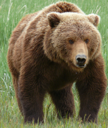

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

This seems to have worked nicely.
Now use fastai's `download_images` to download all the URLs for each of our search terms and put each in a separate folder:

In [9]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [10]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

Our folder has image files, as we'd expect:

In [11]:
fns = get_image_files(path)
fns

(#441) [Path('bears/grizzly/0a185072-ff97-4487-86d9-6054644f1400.jpg'),Path('bears/grizzly/af1293df-a8ab-4078-bbb0-bdc589300f0f.jpg'),Path('bears/grizzly/9b0bec3a-48bf-4462-aad3-60028e8a6bd7.jpg'),Path('bears/grizzly/2761cc23-c0c4-44a5-b76a-d9a8339c9d5d.jpg'),Path('bears/grizzly/1e364101-15d3-4a60-b88e-48c1f329fba1.jpg'),Path('bears/grizzly/14c9ee7f-76f8-406a-a1d7-ea63153b7e96.jpg'),Path('bears/grizzly/b8045370-0568-477f-9e0b-54142aec0ea0.jpg'),Path('bears/grizzly/c3d71ad6-5eff-47be-ad32-d9097349ef14.jpg'),Path('bears/grizzly/9ff50ef9-e6d3-469c-a5c8-a4f917e94bb0.jpg'),Path('bears/grizzly/90e8126c-89c7-41e5-a52a-dc3fb99edb8b.jpg')...]

Downloaded files from the internet may be corrupt, there may be a few that are corrupt. Let's check:

In [12]:
failed = verify_images(fns)
failed

(#8) [Path('bears/grizzly/8ab7dc8d-2542-4b9e-a230-28e5719ca7a3.jpg'),Path('bears/grizzly/93a5a9c8-52c4-439c-8380-dba9d0b9d231.jpg'),Path('bears/grizzly/98530b2e-d908-4f08-b75f-359ec243e1af.jpg'),Path('bears/grizzly/aa12a66d-0a4c-4ada-8660-e42c91eea35f.jpg'),Path('bears/teddy/9a90859a-1785-48ff-9783-342caf43f50c.jpg'),Path('bears/teddy/3b93f640-dc2b-49db-accd-4b946cab15ec.jpg'),Path('bears/teddy/daa00413-9855-4ec3-9020-06e058a4bfc2.jpg'),Path('bears/teddy/b2df0a77-d3f1-41c6-8877-362f4c6b7665.jpg')]

Use `unlink` on each of them to remove all the failed images. 

In [13]:
failed.map(Path.unlink);

## DataLoaders

In [14]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [15]:
dls = bears.dataloaders(path)

A `DataLoaders` includes validation and training `DataLoader`s. `DataLoader` is a class that provides batches of a few items at a time to the GPU. 

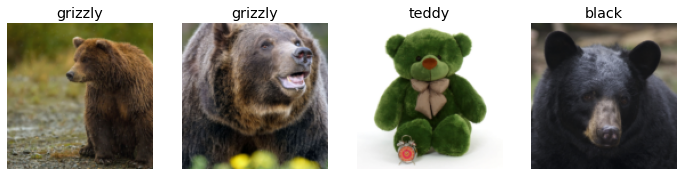

In [16]:
dls.valid.show_batch(max_n=4, nrows=1)

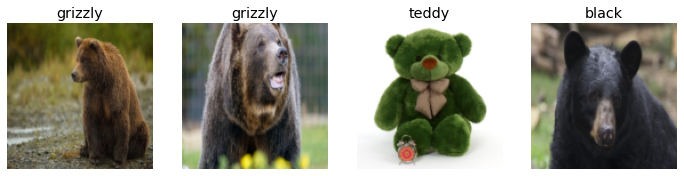

In [17]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish)) # resize crops the image to 128 size
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

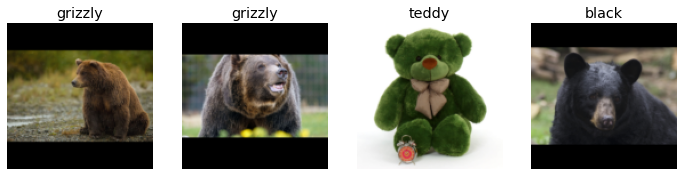

In [18]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

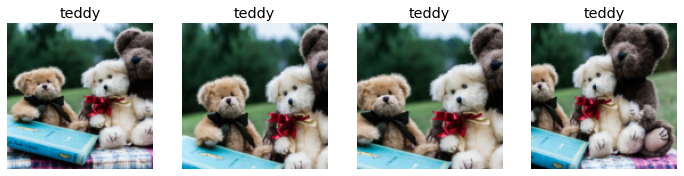

In [21]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
# to show the different versions of this RandomResizedCrop, use unique = True
dls.train.show_batch(max_n=4, nrows=1, unique=True) 

### Data Augmentation

*Data augmentation* refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that we have found work pretty well are provided with the `aug_transforms` function. 

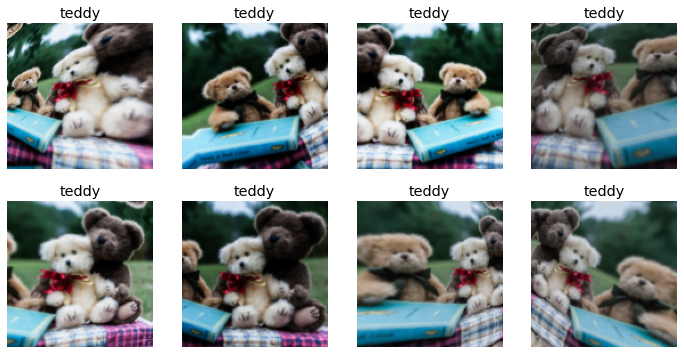

In [22]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Now data is ready and is in a format fit for model training.

# Training Your Model, and Using It to Clean Your Data

In [23]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

Now create our `Learner` and fine-tune it in the conventional way:

In [24]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Checking whether the mistakes the model is making are mainly thinking that grizzlies are teddies, or that grizzlies are black bears, or something else.
<br> 
To visualize this, we can create a *confusion matrix*:

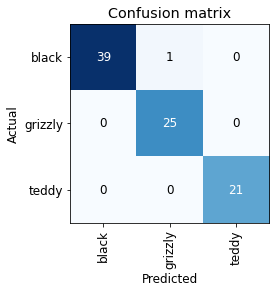

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

> * The rows represent all the black, grizzly, and teddy bears in our dataset, respectively. <br> <br>
> * The columns represent the images which the model predicted as black, grizzly, and teddy bears, respectively. <br><br>
Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal cells represent those which were classified incorrectly.<br><br>
> * This is one of the many ways that fastai allows you to view the results of your model. It is (of course!) calculated using the validation set. With the color-coding, the goal is to have white everywhere except the diagonal, where we want dark blue. <br><br>
This means this bear classifier isn't making many mistakes!

It's helpful to see where exactly our errors are occurring, to see whether they're due to a dataset problem or a model problem. To do this, we can sort our images by their *loss*.
<br><br>
The loss is a number that is higher if the model is incorrect or if it's correct, but not confident of its correct answer. 
<br><br>
The *probability* here is the confidence level, from zero to one, that the model has assigned to its prediction:

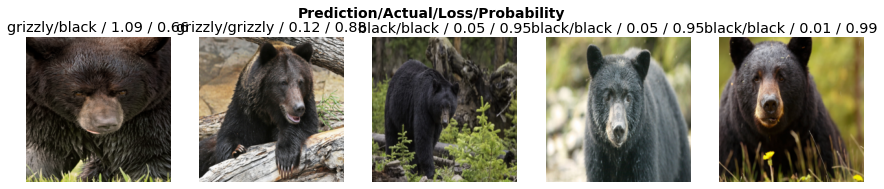

In [26]:
interp.plot_top_losses(5, nrows=1)

In [27]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [28]:
for idx in cleaner.delete(): 
    try:
        cleaner.fns[idx].unlink()
    except:
        pass
for idx,cat in cleaner.change():
    print(str(path/cat)+'/moved-'+str(cleaner.fns[idx].name))
    shutil.move(str(cleaner.fns[idx]), str(path/cat)+'/moved-'+str(cleaner.fns[idx].name))

In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Export the model

In [31]:
learn.export()

Check that the `.pkl` file exists. (model exported)

In [32]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

# Testing.

In [33]:
learn_inf = load_learner('export.pkl')

When we're doing inference, we're generally just getting predictions for one image at a time. To do this, pass a filename to `predict`:

In [34]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([1.5266e-06, 1.0000e+00, 5.1179e-08]))

This has returned three things: the predicted category in the same format you originally provided (in this case that's a string), the index of the predicted category, and the probabilities of each category. The last two are based on the order of categories in the *vocab* of the `DataLoaders`; that is, the stored list of all possible categories. At inference time, you can access the `DataLoaders` as an attribute of the `Learner`:

In [35]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

We can see here that if we index into the vocab with the integer returned by `predict` then we get back "grizzly," as expected. Also, note that if we index into the list of probabilities, we see a nearly 1.00 probability that this is a grizzly.

# Creating a Notebook App from the Model

In [48]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [49]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [50]:
btn_upload.observe(on_data_change, names=['data'])

In [51]:
display(VBox([widgets.Label('Select your bear!'), btn_upload, out_pl, lbl_pred]))